# Visualize the results of the linear model

In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))

In [2]:
input_dir <- "results"
lm_file <- file.path(input_dir, "linear_model_cp_features.tsv")
lm_dp_file <- file.path(input_dir, "linear_model_dp_features.tsv")

output_fig_dir <- "figures"
lm_fig <- file.path(output_fig_dir, "linear_model_cp_features.png")
lm_dp_fig <- file.path(output_fig_dir, "linear_model_dp_features.png")

## Visualize CP features

In [3]:
# Load and process linear model data
lm_df <- readr::read_tsv(
    lm_file, col_types = readr::cols(.default = "d", feature = "c")
)

# Arrange by absolute value coefficient
# Split out components of feature name for visualization
lm_df <- lm_df %>%
    dplyr::arrange(desc(abs(Null_coef))) %>%
    tidyr::separate(
        feature,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel", 
            "parameter1", 
            "parameter2"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)

# Clean channel for visualization
lm_df$channel_cleaned <-
    dplyr::recode(
        lm_df$channel_cleaned,
        "DAPI" = "nuclei",
        "RFP" = "actin",
        "GFP" = "ER",
        .default = "other",
        .missing="other"
    )

print(dim(lm_df))
head(lm_df, 10)

Warning message:
“Expected 6 pieces. Additional pieces discarded in 312 rows [6, 7, 8, 9, 10, 11, 12, 13, 17, 18, 19, 20, 21, 22, 23, 24, 27, 29, 34, 35, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 731 rows [1, 2, 3, 4, 5, 14, 15, 16, 25, 26, 28, 30, 31, 32, 33, 40, 41, 43, 44, 45, ...].”


[1] 1043   12


feature,compartment,feature_group,measurement,channel,parameter1,parameter2,r2_score,cell_count_coef,Null_coef,WT_coef,channel_cleaned
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Cytoplasm_Intensity_MinIntensityEdge_DAPI,Cytoplasm,Intensity,MinIntensityEdge,DAPI,NA,NA,0.5980773,0.0642935031,-0.7653787,0.7653787,nuclei
Cells_Intensity_MinIntensityEdge_DAPI,Cells,Intensity,MinIntensityEdge,DAPI,NA,NA,0.5980773,0.0642935031,-0.7653787,0.7653787,nuclei
Cytoplasm_Intensity_LowerQuartileIntensity_DAPI,Cytoplasm,Intensity,LowerQuartileIntensity,DAPI,NA,NA,0.6356989,0.0649513635,-0.6843496,0.6843496,nuclei
Cytoplasm_Intensity_MinIntensity_DAPI,Cytoplasm,Intensity,MinIntensity,DAPI,NA,NA,0.6225846,0.0640082616,-0.6595804,0.6595804,nuclei
Cells_Intensity_MinIntensity_DAPI,Cells,Intensity,MinIntensity,DAPI,NA,NA,0.6225846,0.0640082616,-0.6595804,0.6595804,nuclei
Cells_Texture_AngularSecondMoment_GFP_3_01_256,Cells,Texture,AngularSecondMoment,GFP,3,01,0.2369862,0.0016269600,-0.6091507,0.6091507,ER
Cells_Texture_AngularSecondMoment_GFP_3_00_256,Cells,Texture,AngularSecondMoment,GFP,3,00,0.2392290,0.0010091365,-0.6033047,0.6033047,ER
Cytoplasm_Texture_AngularSecondMoment_GFP_3_01_256,Cytoplasm,Texture,AngularSecondMoment,GFP,3,01,0.2270749,0.0018888742,-0.6003606,0.6003606,ER
Cytoplasm_Texture_AngularSecondMoment_GFP_3_00_256,Cytoplasm,Texture,AngularSecondMoment,GFP,3,00,0.2285987,0.0011662937,-0.5922695,0.5922695,ER


## Visualize linear modeling results

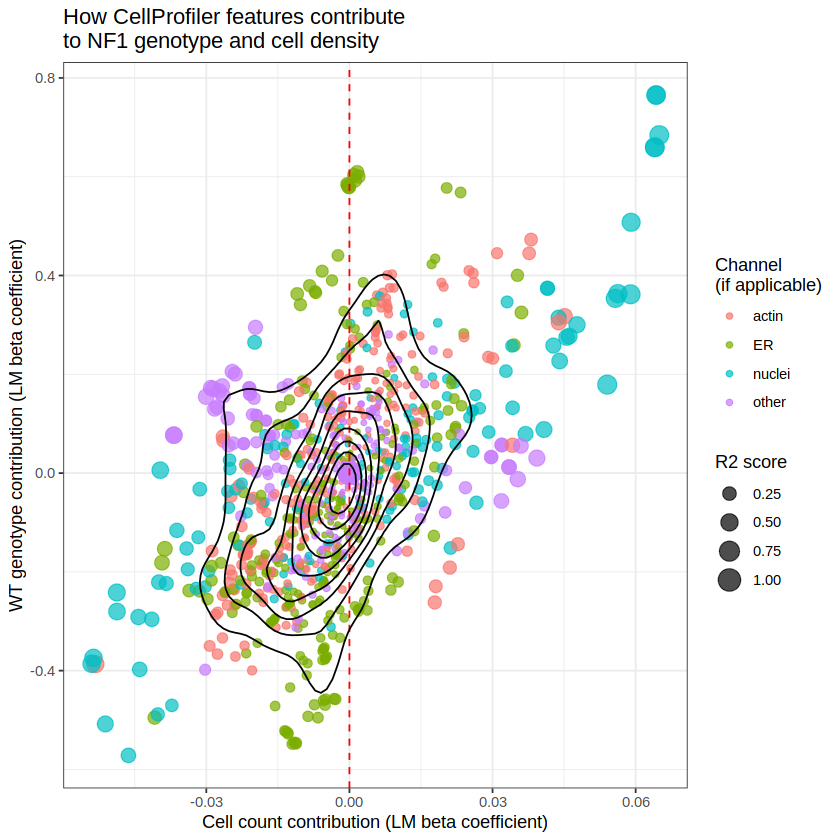

In [4]:
lm_fig_gg <- (
    ggplot(lm_df, aes(x = cell_count_coef, y = WT_coef))
    + geom_point(aes(size = r2_score, color = channel_cleaned), alpha = 0.7)
    + geom_vline(xintercept = 0, linetype = "dashed", color = "red")
    + geom_density2d(color="black", show.legend = FALSE)
    + theme_bw()
    + guides(
        color = guide_legend(title = "Channel\n(if applicable)", order = 1),
        size = guide_legend(title = "R2 score")
    )
    + ylab("WT genotype contribution (LM beta coefficient)")
    + xlab("Cell count contribution (LM beta coefficient)")
    + ggtitle("How CellProfiler features contribute\nto NF1 genotype and cell density")
)

# Output figure
ggsave(lm_fig, lm_fig_gg, dpi = 500, height = 6, width = 6)

lm_fig_gg

## Visualize DP features

In [5]:
# Load and process linear model data
lm_dp_df <- readr::read_tsv(
    lm_dp_file, col_types = readr::cols(.default = "d", feature = "c")
)

print(dim(lm_dp_df))
head(lm_dp_df, 10)

[1] 3832    5


feature,r2_score,cell_count_coef,Null_coef,WT_coef
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
efficientnet_0,0.04655088,-1.313378e-02,0.098892191,-0.098892191
efficientnet_1,0.02633479,9.009381e-03,-0.246789424,0.246789424
efficientnet_2,0.32808305,-2.803389e-02,0.001363537,-0.001363537
efficientnet_3,0.02219074,5.271694e-03,-0.223836924,0.223836924
efficientnet_4,0.01098208,8.577969e-05,-0.116930972,0.116930972
efficientnet_5,0.02720802,8.035771e-03,-0.254575592,0.254575592
efficientnet_6,0.28784697,-2.469479e-02,-0.047766189,0.047766189
efficientnet_7,0.12811744,-1.571657e-02,-0.054523326,0.054523326
efficientnet_8,0.04137526,-8.303460e-03,-0.048898004,0.048898004


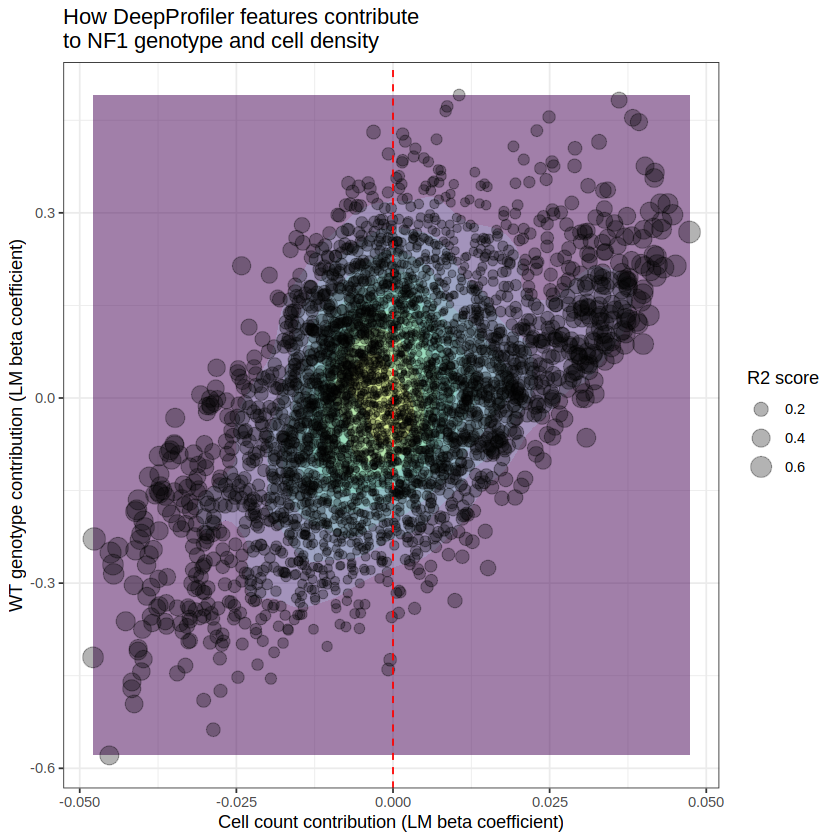

In [6]:
lm_dp_fig_gg <- (
    ggplot(lm_dp_df, aes(x = cell_count_coef, y = WT_coef))
    + geom_density_2d_filled(alpha = 0.5, show.legend = FALSE)
    + geom_point(aes(size = r2_score), alpha = 0.3)
    + geom_vline(xintercept = 0, linetype = "dashed", color = "red")
    + theme_bw()
    + guides(
        size = guide_legend(title = "R2 score")
    )
    + ylab("WT genotype contribution (LM beta coefficient)")
    + xlab("Cell count contribution (LM beta coefficient)")
    + ggtitle("How DeepProfiler features contribute\nto NF1 genotype and cell density")
)

# Output figure
ggsave(lm_dp_fig, lm_dp_fig_gg, dpi = 500, height = 6, width = 6)

lm_dp_fig_gg